# Part 1-Domain Health Care

### 1. Import and warehouse data:

As a part of the step 1- Importing all the necessary files. From the analysis it is observed that the columns are same.
Hence,using vertical stack to get the final data frame

In [246]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
# Importing Data files
df_1 = pd.read_csv('Part1 - Normal.csv')
df_2 = pd.read_csv('Part1 - Type_H.csv')
df_3 = pd.read_csv('Part1 - Type_S.csv')
print(df_1.shape)
print(df_2.shape)
print(df_3.shape)


(100, 7)
(60, 7)
(150, 7)


In [47]:
#since the columns are same we need to stack the data vertically in the new data frame
df_01 = pd.concat([df_1, df_2], axis=0)
df_01.shape


(160, 7)

In [48]:
final_df=pd.concat([df_01, df_3], axis=0)
final_df.shape

(310, 7)

In [49]:
final_df.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal


### 2.Data Cleansing

From the given data all the fields are in float and Class is in object type.There are no null values in the given data frame.

In [50]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310 entries, 0 to 149
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  310 non-null    float64
 1   P_tilt       310 non-null    float64
 2   L_angle      310 non-null    float64
 3   S_slope      310 non-null    float64
 4   P_radius     310 non-null    float64
 5   S_Degree     310 non-null    float64
 6   Class        310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 19.4+ KB


In [51]:
final_df.isna().sum() #There are no null values.Hence, no requirement to impute or change the values

P_incidence    0
P_tilt         0
L_angle        0
S_slope        0
P_radius       0
S_Degree       0
Class          0
dtype: int64

### 3.Data analysis and Visualisation

In [52]:
final_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
P_incidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
P_tilt,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
L_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
S_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
P_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
S_Degree,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082


#### 1. Uni-Variate analysis Visualisation

Since the variables P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree are continous plotting the histogram for the variables
From the below plot it can be understood that P_incidence is bi-modal and skewed towards the left , and there are outliers  between 120-140
s-Degree is skewed towards the left and there are outliers at 400
s-slope is skewed towards the left and there are outliers at 120-140

<Figure size 432x288 with 0 Axes>

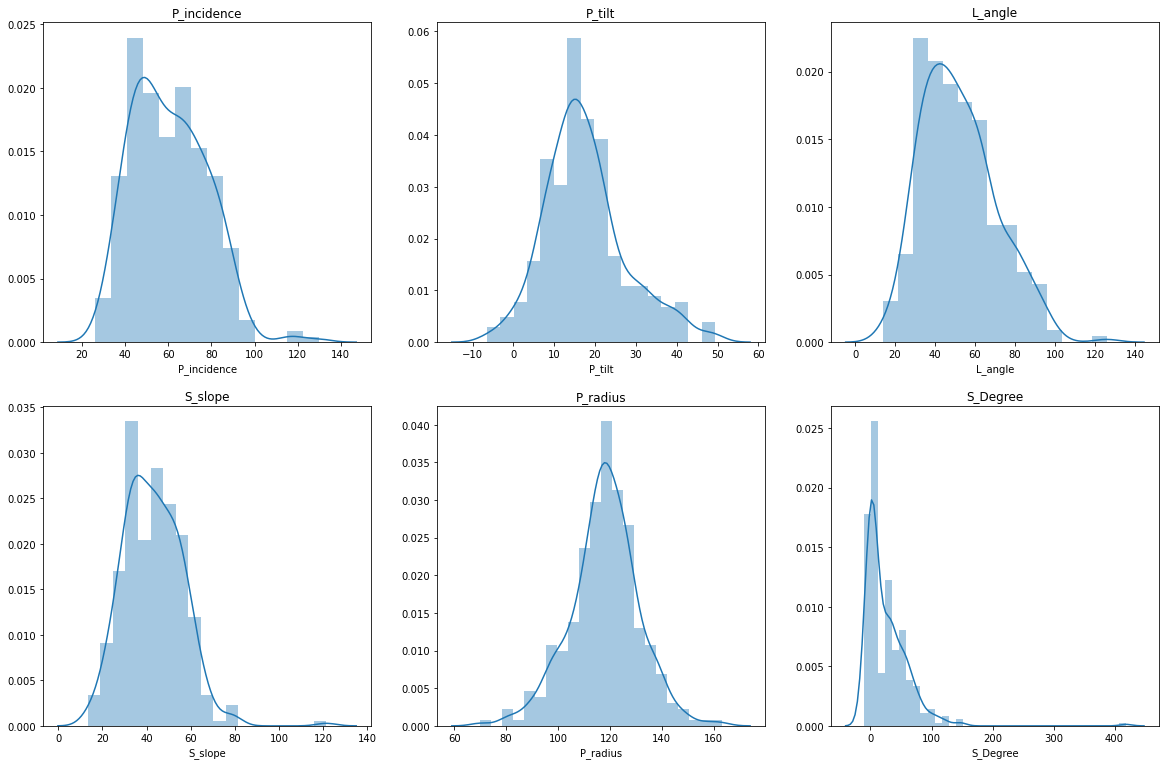

In [53]:

fig = plt.figure()
plt.figure(figsize=(20,20))
plt.subplot(3, 3, 1)
sns.distplot(final_df.P_incidence, kde=True)
plt.title('P_incidence')

plt.subplot(3, 3, 2)
sns.distplot(final_df.P_tilt, kde=True)
plt.title('P_tilt')

plt.subplot(3, 3, 3)
sns.distplot(final_df.L_angle, kde=True)
plt.title('L_angle')

plt.subplot(3, 3, 4)
sns.distplot(final_df.S_slope, kde=True)
plt.title('S_slope')

plt.subplot(3, 3, 5)
sns.distplot(final_df.P_radius, kde=True)
plt.title('P_radius')

plt.subplot(3, 3, 6)
sns.distplot(final_df.S_Degree, kde=True)
plt.title('S_Degree')


plt.show();


Since Class is a  ctegorical variable ,plotting the count plot

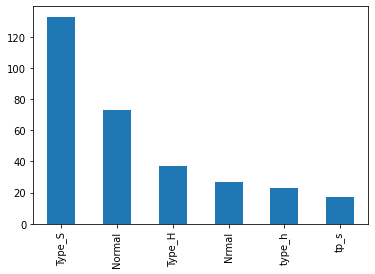

In [54]:

pd.value_counts(final_df["Class"]).plot(kind="bar")

#### 2. Bi-Variate Analysis

<Figure size 432x288 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

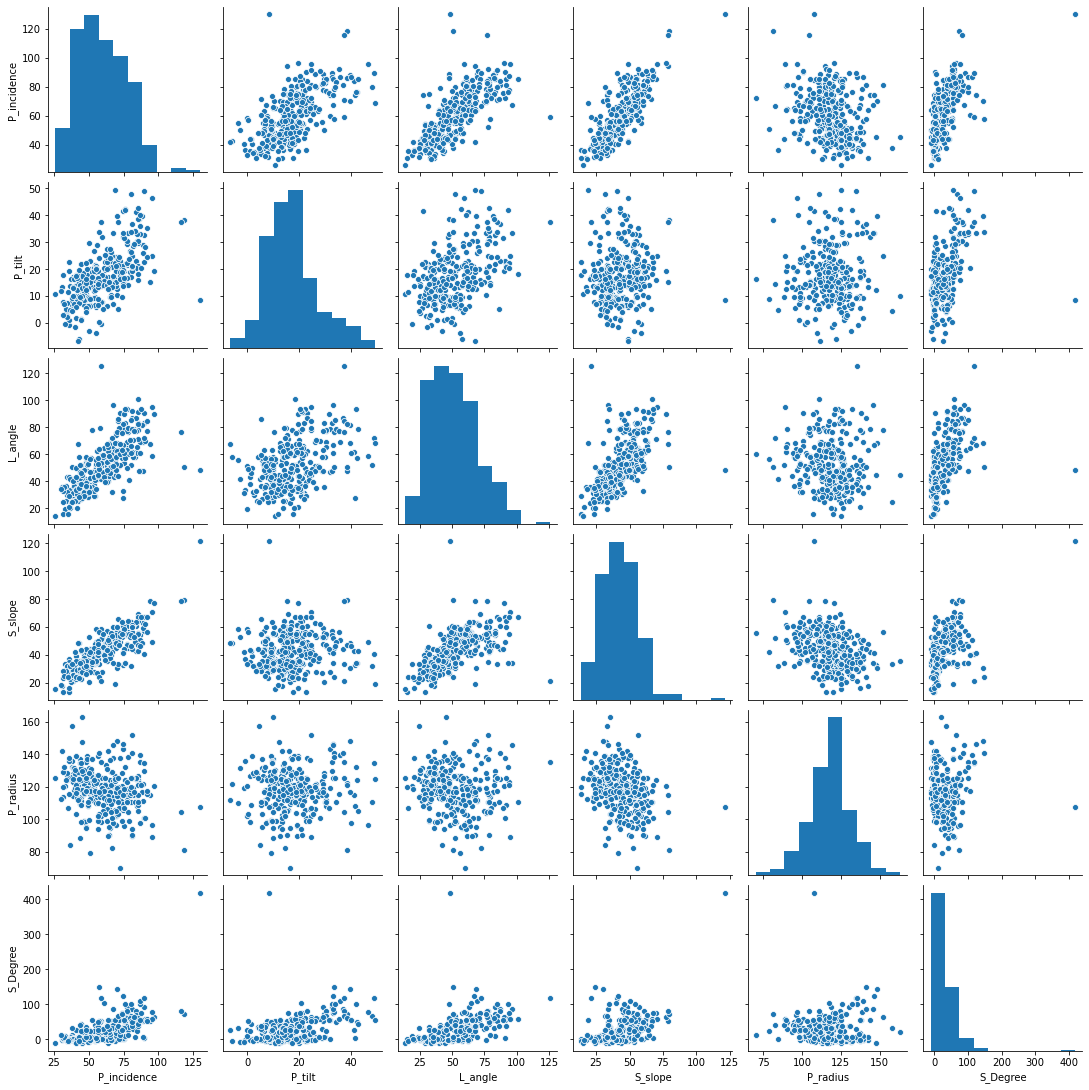

In [55]:
fig = plt.figure()
plt.figure(figsize=(20,20))
sns.pairplot(final_df)

From the below heat map it can be infered that S-Slope and P_incidence are highly correlated L_angle and P_incidence are highly correlated there is no significant correlation between any of the dependent variables and the target variable Class

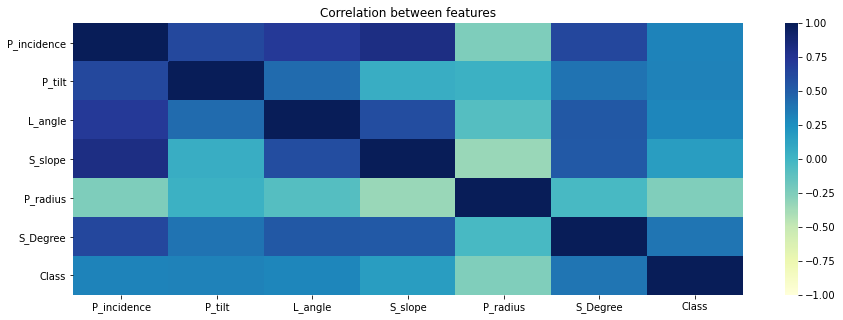

In [29]:
corr = final_df.corr() 
plt.figure(figsize=(15, 5))
sns.heatmap(corr, cmap='YlGnBu', vmax=1.0, vmin=-1.0)
plt.title('Correlation between features')
plt.show()

In [30]:
print(corr)

             P_incidence    P_tilt   L_angle   S_slope  P_radius  S_Degree  \
P_incidence     1.000000  0.629199  0.717282  0.814960 -0.247467  0.638743   
P_tilt          0.629199  1.000000  0.432764  0.062345  0.032668  0.397862   
L_angle         0.717282  0.432764  1.000000  0.598387 -0.080344  0.533667   
S_slope         0.814960  0.062345  0.598387  1.000000 -0.342128  0.523557   
P_radius       -0.247467  0.032668 -0.080344 -0.342128  1.000000 -0.026065   
S_Degree        0.638743  0.397862  0.533667  0.523557 -0.026065  1.000000   
Class           0.317382  0.326183  0.300247  0.164345 -0.255788  0.388923   

                Class  
P_incidence  0.317382  
P_tilt       0.326183  
L_angle      0.300247  
S_slope      0.164345  
P_radius    -0.255788  
S_Degree     0.388923  
Class        1.000000  


### 4.Data Pre Processing

In [56]:
pd.value_counts(final_df["Class"])

Type_S    133
Normal     73
Type_H     37
Nrmal      27
type_h     23
tp_s       17
Name: Class, dtype: int64

Since the class data type is of different categories...creating dummy variables using label encoder to convert categorical variables to one-hot encoding

In [57]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
final_df['Class'] = le.fit_transform(final_df['Class'])

In [61]:
pd.value_counts(final_df["Class"])

3    133
0     73
2     37
1     27
5     23
4     17
Name: Class, dtype: int64

The data set is balanced

In [284]:
#splitting  the dataset into training and test datasets
import numpy as np
from sklearn.model_selection import train_test_split

# Transforming  data into features and target
X = np.array(final_df.drop('Class',axis=1) ) # # Predictor feature columns (6 X m)
y = np.array(final_df['Class'])# Predicted class (0,1,2,3,4,5) (1 X m)



# split into train and tes1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [285]:
print("Training-Predictor feature shape",X_train.shape)
print("Training-Predicted Class shape",y_train.shape)
print("Test-Predictor feature shape",X_test.shape)
print("Test-Predicted Class shape",y_test.shape)

Training-Predictor feature shape (217, 6)
Training-Predicted Class shape (217,)
Test-Predictor feature shape (93, 6)
Test-Predicted Class shape (93,)


### 5.Model Training Testing and Tuning

In [286]:
# loading library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

# Creating the prediction list for k=3
# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors = 3)
# fitting the model
knn.fit(X_train, y_train)
# predict the response
y_pred = knn.predict(X_test)
# evaluating accuracy
print(accuracy_score(y_test, y_pred))


0.6344086021505376


In [287]:
# creating odd list of K for KNN
myList = list(range(1,20))
neighbors = list(myList)

In [288]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # predict the response
    y_pred = knn.predict(X_test)
    # evaluate accuracy
    scores = accuracy_score(y_test, y_pred)
    ac_scores.append(scores)

# changing to misclassification error
MSE = [1 - x for x in ac_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 10


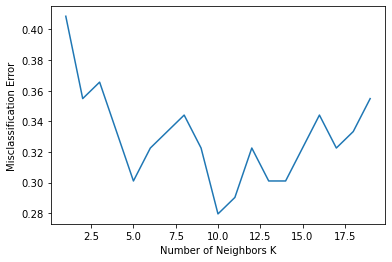

In [289]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [290]:
#Use k=10 as the final model for prediction
knn = KNeighborsClassifier(n_neighbors = 10)
# fitting the model
knn.fit(X_train, y_train)
# predicting the response
y_pred = knn.predict(X_test)
# evaluating accuracy
print(accuracy_score(y_test, y_pred))
#print("Precision Score : ",precision_score(y_test, y_pred,pos_label='positive',average='weighted'))
print("Recall Score : ",recall_score(y_test, y_pred,pos_label='positive',average='weighted'))

0.7204301075268817
Recall Score :  0.7204301075268817


C:\Softwares\lib\site-packages\sklearn\metrics\_classification.py:1267: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


# Part-2-Banking and finance

### 1. Import and warehouse data:

As a part of the step 1- Importing all the necessary files. From the analysis it is observed that the rows are same.
Hence,using horizontal stack to get the final data frame

In [411]:
#Importing necessary files 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import average_precision_score, confusion_matrix, accuracy_score, classification_report, plot_confusion_matrix


In [412]:
#Reading data from the files
df_1 = pd.read_csv('Part2 - Data1.csv')#Reading data from first file
df_2 = pd.read_csv('Part2 -Data2.csv')#Reading data from second file
#Since Id column is present in both the data frames and it is one on one mapping, dropping the column ID from 2nd data frame
df_2 = df_2.drop('ID', axis =1 )

In [413]:
#combing the two data frames df_1 and df_2 using the concat function
cr_df = pd.concat([df_1, df_2], axis=1)

In [414]:
cr_df.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN


In [415]:
#Shape of the final data frame
print("The final shape after combining the data frames is ",cr_df.shape)
print("The final size after combining the data frames is ",cr_df.size)


The final shape after combining the data frames is  (5000, 14)
The final size after combining the data frames is  70000


In [416]:
cr_df.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN


### 2. Data cleansing:

Since the column id and Zipcode donot contribute to the regression. Dropping the values. Replacing the null values in Loan On card with -1, since we are not sure of the value

In [417]:
#Dropping the Id column
cr_df = cr_df.drop('ID', axis =1 )

In [418]:
cr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  5000 non-null   int64  
 1   CustomerSince        5000 non-null   int64  
 2   HighestSpend         5000 non-null   int64  
 3   ZipCode              5000 non-null   int64  
 4   HiddenScore          5000 non-null   int64  
 5   MonthlyAverageSpend  5000 non-null   float64
 6   Level                5000 non-null   int64  
 7   Mortgage             5000 non-null   int64  
 8   Security             5000 non-null   int64  
 9   FixedDepositAccount  5000 non-null   int64  
 10  InternetBanking      5000 non-null   int64  
 11  CreditCard           5000 non-null   int64  
 12  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(11)
memory usage: 507.9 KB


In [419]:
cr_df['ZipCode'].value_counts()

94720    169
94305    127
95616    116
90095     71
93106     57
        ... 
96145      1
94970      1
94598      1
90068      1
94087      1
Name: ZipCode, Length: 467, dtype: int64

In [420]:
#Dropping the Zipcode value
cr_df.drop('ZipCode',axis=1)

,Age,CustomerSince,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,25,1,49,4,1.6,1,0,1,0,0,0,NaN
1,45,19,34,3,1.5,1,0,1,0,0,0,NaN
2,39,15,11,1,1.0,1,0,0,0,0,0,NaN
3,35,9,100,1,2.7,2,0,0,0,0,0,NaN
4,35,8,45,4,1.0,2,0,0,0,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,1,0,0.0
4996,30,4,15,4,0.4,1,85,0,0,1,0,0.0
4997,63,39,24,2,0.3,3,0,0,0,0,0,0.0
4998,65,40,49,3,0.5,2,0,0,0,1,0,0.0


In [421]:
#Exploring the data frame for the null values
cr_df.isna().sum()

Age                     0
CustomerSince           0
HighestSpend            0
ZipCode                 0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64

In [422]:
#Replacing the NaN values with -1's
cr_df['LoanOnCard'].fillna(-1,inplace = True)

In [423]:
cr_df['LoanOnCard'].value_counts()

 0.0    4500
 1.0     480
-1.0      20
Name: LoanOnCard, dtype: int64

In [424]:
cr_df.isna().sum()

Age                    0
CustomerSince          0
HighestSpend           0
ZipCode                0
HiddenScore            0
MonthlyAverageSpend    0
Level                  0
Mortgage               0
Security               0
FixedDepositAccount    0
InternetBanking        0
CreditCard             0
LoanOnCard             0
dtype: int64

### 3. Data analysis & visualisation:

#### 1. Uni-Variate analysis

In [425]:
cr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  5000 non-null   int64  
 1   CustomerSince        5000 non-null   int64  
 2   HighestSpend         5000 non-null   int64  
 3   ZipCode              5000 non-null   int64  
 4   HiddenScore          5000 non-null   int64  
 5   MonthlyAverageSpend  5000 non-null   float64
 6   Level                5000 non-null   int64  
 7   Mortgage             5000 non-null   int64  
 8   Security             5000 non-null   int64  
 9   FixedDepositAccount  5000 non-null   int64  
 10  InternetBanking      5000 non-null   int64  
 11  CreditCard           5000 non-null   int64  
 12  LoanOnCard           5000 non-null   float64
dtypes: float64(2), int64(11)
memory usage: 507.9 KB


In [426]:
column_name=list(cr_df.columns)

From the below analysis it can be understood that the columns Hiddenscorelevel,Level,Security,Fixeddeposit,InternetBanking,Credit Card, Loan on Card are categorical variables. Hence, they need to be created into dummy variables for them

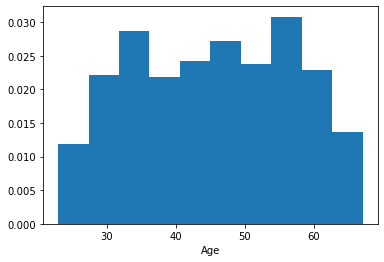

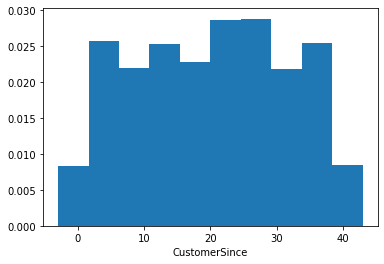

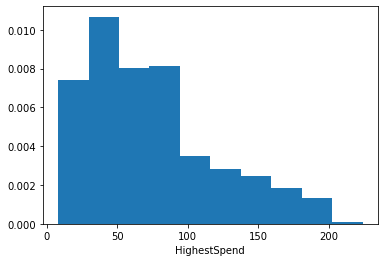

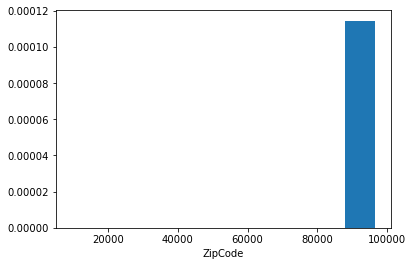

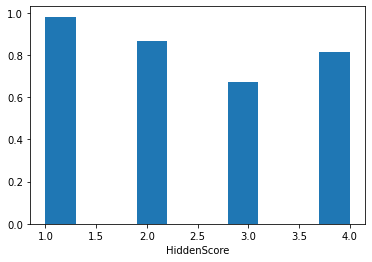

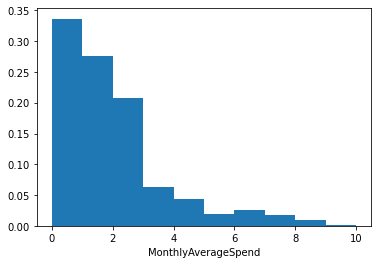

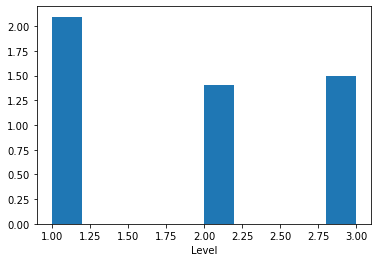

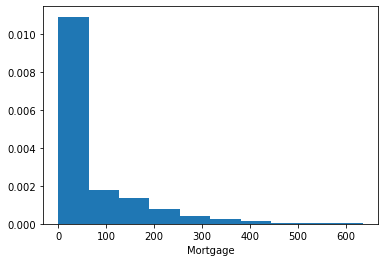

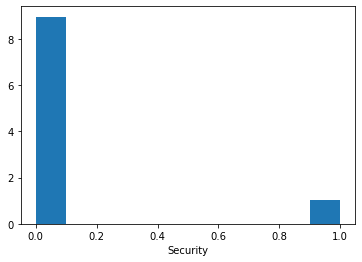

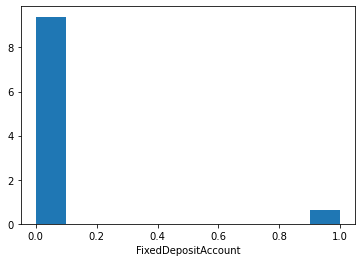

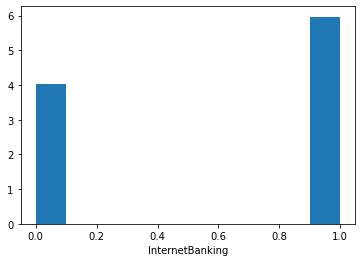

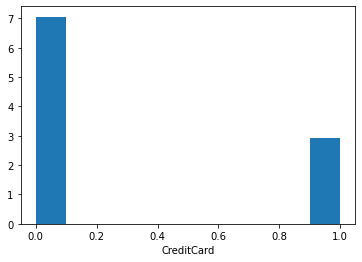

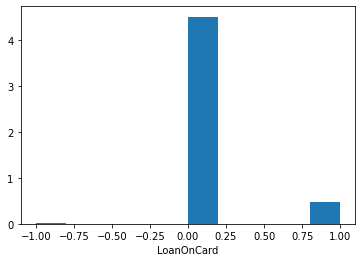

In [427]:
#fig = plt.figure(figsize=(20,20))        
# Lazy counter so we can remove unwated axes
nrows=5
ncolumns=3
counter = 0
column_name=list(cr_df.columns)
for i in range(nrows):
    for j in range(ncols):
        # Plot when we have data
                if counter < len(cr_df.columns):
                                plt.hist(cr_df.iloc[:, counter],density=True)
                                plt.xlabel(column_name[counter])
                                counter=counter+1
                                plt.show()
                                
    
                 


### Bi-Variate Analysis

BiVariate Analysis

<Figure size 432x288 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

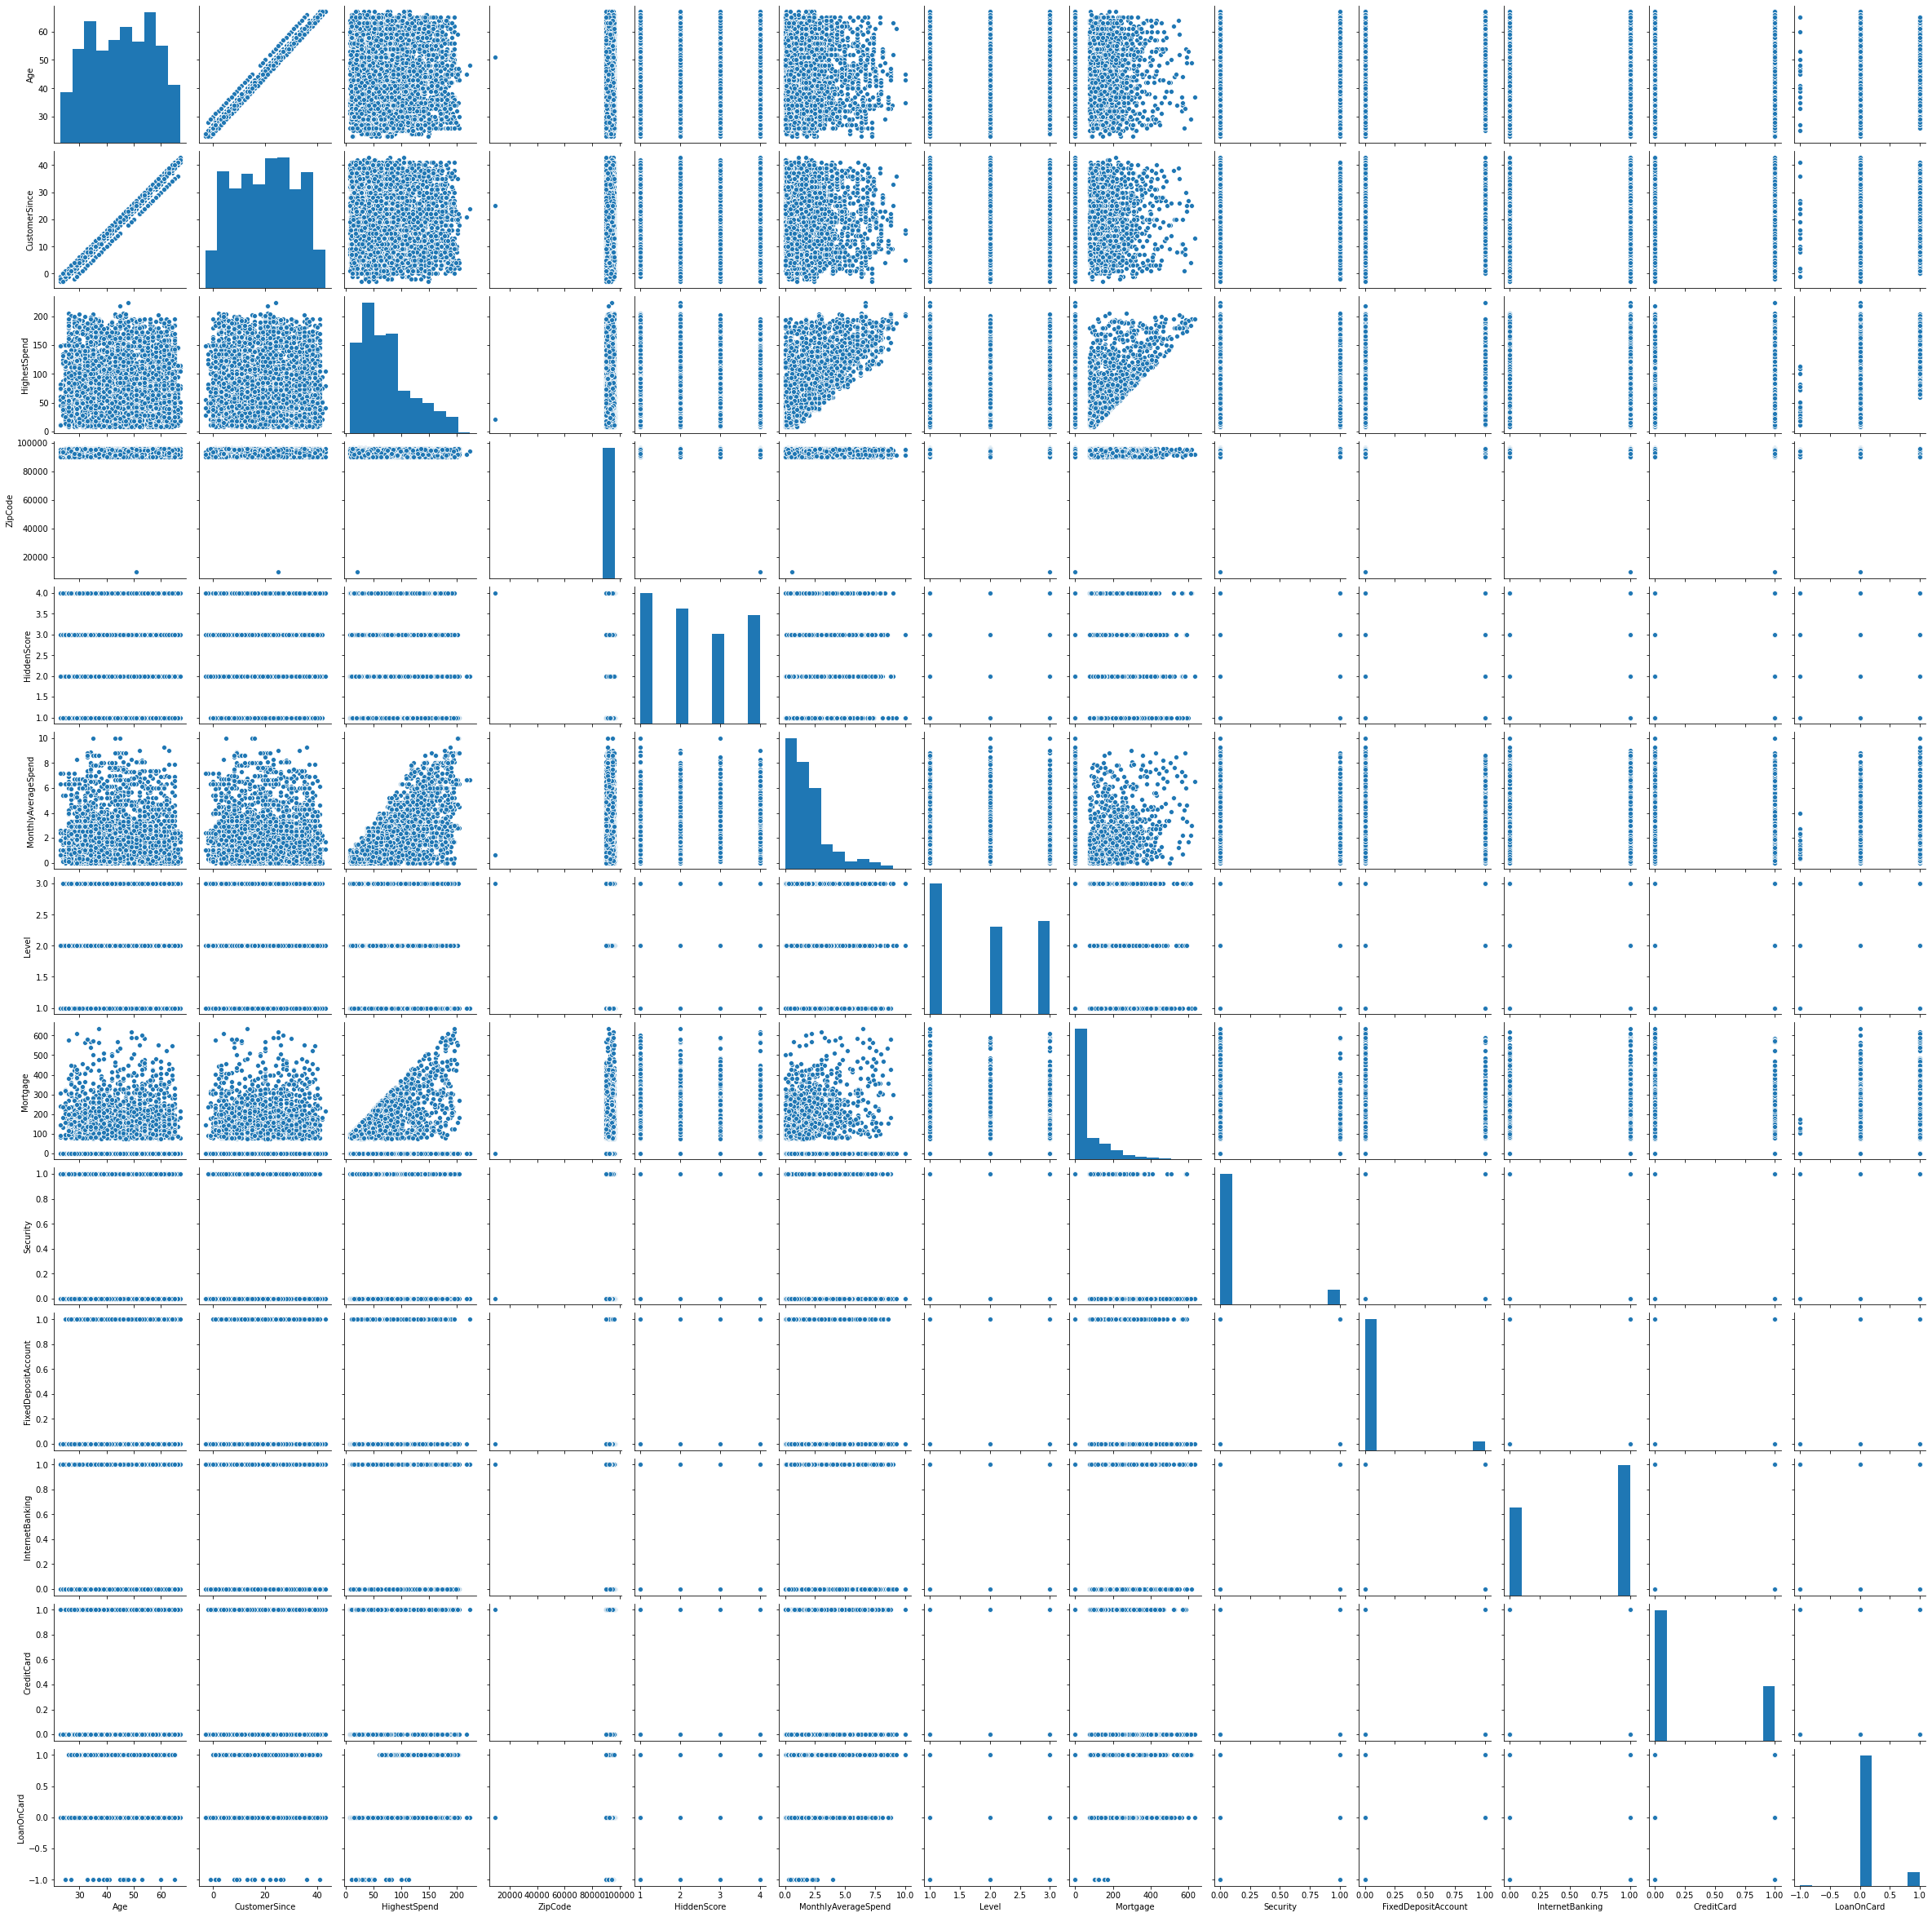

In [367]:
fig = plt.figure()
plt.figure(figsize=(20,20))
sns.pairplot(cr_df)

From the below heat map it can be infered that the Highestspend and Monthly average spend are correlated with Loan On Card.
Also it can be infered that the Monthly average spend and highest spend are highy correlated.


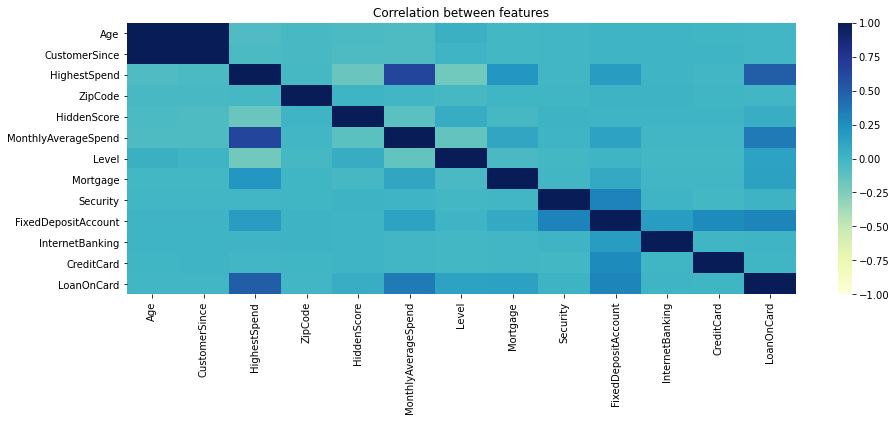

In [368]:
# To get a correlation matrix 
# Ploting correlation plot
corr = cr_df.corr() 
plt.figure(figsize=(15, 5))

# plotting the heat map
# corr: give the correlation matrix
# cmap: colour code used for plotting
# vmax: gives maximum range of values for the chart
# vmin: gives minimum range of values for the chart

sns.heatmap(corr, cmap='YlGnBu', vmax=1.0, vmin=-1.0)

# specify name of the plot
plt.title('Correlation between features')
plt.show()
##

### 4. Data Pre-Processing

In [428]:
#Convert X & Y variable to a categorical variable as relevant
cr_df['LoanOnCard'] = cr_df['LoanOnCard'].astype('category')

In [479]:
cr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Age                  5000 non-null   int64   
 1   CustomerSince        5000 non-null   int64   
 2   HighestSpend         5000 non-null   int64   
 3   ZipCode              5000 non-null   int64   
 4   HiddenScore          5000 non-null   int64   
 5   MonthlyAverageSpend  5000 non-null   float64 
 6   Level                5000 non-null   int64   
 7   Mortgage             5000 non-null   int64   
 8   Security             5000 non-null   int64   
 9   FixedDepositAccount  5000 non-null   int64   
 10  InternetBanking      5000 non-null   int64   
 11  CreditCard           5000 non-null   int64   
 12  LoanOnCard           5000 non-null   category
dtypes: category(1), float64(1), int64(11)
memory usage: 473.9 KB


In [481]:
oneHotCols=["HiddenScore","Level","Security","FixedDepositAccount","InternetBanking","CreditCard"]
cr_df=pd.get_dummies(cr_df, columns=oneHotCols)
cr_df.head(10)

,Age,CustomerSince,HighestSpend,ZipCode,MonthlyAverageSpend,Mortgage,LoanOnCard,HiddenScore_1,HiddenScore_2,HiddenScore_3,...,Level_2,Level_3,Security_0,Security_1,FixedDepositAccount_0,FixedDepositAccount_1,InternetBanking_0,InternetBanking_1,CreditCard_0,CreditCard_1
0,25,1,49,91107,1.6,0,-1.0,0,0,0,...,0,0,0,1,1,0,1,0,1,0
1,45,19,34,90089,1.5,0,-1.0,0,0,1,...,0,0,0,1,1,0,1,0,1,0
2,39,15,11,94720,1.0,0,-1.0,1,0,0,...,0,0,1,0,1,0,1,0,1,0
3,35,9,100,94112,2.7,0,-1.0,1,0,0,...,1,0,1,0,1,0,1,0,1,0
4,35,8,45,91330,1.0,0,-1.0,0,0,0,...,1,0,1,0,1,0,1,0,0,1
5,37,13,29,92121,0.4,155,-1.0,0,0,0,...,1,0,1,0,1,0,0,1,1,0
6,53,27,72,91711,1.5,0,-1.0,0,1,0,...,1,0,1,0,1,0,0,1,1,0
7,50,24,22,93943,0.3,0,-1.0,1,0,0,...,0,1,1,0,1,0,1,0,0,1
8,35,10,81,90089,0.6,104,-1.0,0,0,1,...,1,0,1,0,1,0,0,1,1,0
9,34,9,180,93023,8.9,0,1.0,1,0,0,...,0,1,1,0,1,0,1,0,1,0


In [482]:
cr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Age                    5000 non-null   int64   
 1   CustomerSince          5000 non-null   int64   
 2   HighestSpend           5000 non-null   int64   
 3   ZipCode                5000 non-null   int64   
 4   MonthlyAverageSpend    5000 non-null   float64 
 5   Mortgage               5000 non-null   int64   
 6   LoanOnCard             5000 non-null   category
 7   HiddenScore_1          5000 non-null   uint8   
 8   HiddenScore_2          5000 non-null   uint8   
 9   HiddenScore_3          5000 non-null   uint8   
 10  HiddenScore_4          5000 non-null   uint8   
 11  Level_1                5000 non-null   uint8   
 12  Level_2                5000 non-null   uint8   
 13  Level_3                5000 non-null   uint8   
 14  Security_0             5000 non-null   u

In [498]:
# Transforming  data into features and target

X = cr_df.drop("LoanOnCard", axis=1)
y = cr_df['LoanOnCard']
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [499]:
print("Training-Predictor feature shape",X_train.shape)
print("Training-Predicted Class shape",y_train.shape)
print("Test-Predictor feature shape",X_test.shape)
print("Test-Predicted Class shape",y_test.shape)

Training-Predictor feature shape (3500, 21)
Training-Predicted Class shape (3500,)
Test-Predictor feature shape (1500, 21)
Test-Predicted Class shape (1500,)


### 5. Model training, testing and tuning:

In [500]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0)
model.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [501]:
y_predict = model.predict(X_test)
coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1         2         3         4         5         6  \
0 -0.000433 -0.000216 -0.011576 -0.000017 -0.000239 -0.004014 -0.000005   
1 -0.003471 -0.003276 -0.011444  0.000042 -0.002077  0.001533  0.000815   
2  0.003904  0.003492  0.023021 -0.000026  0.002316  0.002481 -0.000810   

          7         8         9  ...        12        13        14        15  \
0 -0.000032  0.000013  0.000019  ...  0.000004  0.000002 -0.000007  0.000014   
1  0.000807 -0.000736 -0.000867  ... -0.001263  0.000255 -0.000236  0.000980   
2 -0.000776  0.000723  0.000848  ...  0.001259 -0.000257  0.000242 -0.000995   

         16        17            18        19        20  intercept  
0 -0.000019 -0.000005  4.576563e-07  0.000032 -0.000037  -0.000005  
1 -0.000961 -0.000009  2.885252e-05 -0.000029  0.000049   0.000020  
2  0.000980  0.000014 -2.931018e-05 -0.000003 -0.000012  -0.000015  

[3 rows x 22 columns]


In [502]:
y_pred = model.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [503]:
Logistic_model_score = model.score(X_test, y_test)
print(Logistic_model_score)
print(accuracy_score(y_test, y_pred))

0.9133333333333333
0.9133333333333333


In [504]:
print(classification_report(y_test, y_pred, digits=2))

              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         7
         0.0       0.93      0.98      0.95      1355
         1.0       0.61      0.30      0.41       138

    accuracy                           0.91      1500
   macro avg       0.51      0.43      0.45      1500
weighted avg       0.89      0.91      0.90      1500



C:\Softwares\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


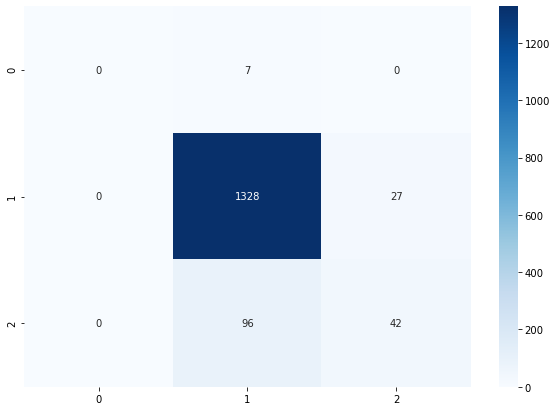

In [505]:
conf_mat = confusion_matrix(y_test, y_pred)
df_conf_mat = pd.DataFrame(conf_mat)
plt.figure(figsize = (10,7))
sns.heatmap(df_conf_mat, annot=True,cmap='Blues', fmt='g')

### Gaussian-Naive Bayes

In [507]:
g_X = cr_df.drop("LoanOnCard", axis=1)
g_y = cr_df['LoanOnCard']
# split into train and test
g_X_train, g_X_test, g_y_train, g_y_test = train_test_split(g_X, g_y, test_size=0.3, random_state=7)

In [508]:
# To model the Gaussian Navie Bayes classifier
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(g_X_train, g_y_train)

GaussianNB()

In [509]:
g_Y_pred = clf.predict(g_X_test)

In [510]:
accuracy_score(g_y_test, g_Y_pred, normalize = True)

0.8846666666666667

### Trying KNN model for the same data

In [511]:
k_X = cr_df.drop("LoanOnCard", axis=1)
k_y = cr_df['LoanOnCard']
# split into train and test
k_X_train, k_X_test, k_y_train, k_y_test = train_test_split(k_X, k_y, test_size=0.3, random_state=7)

In [512]:
# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors = 3)

# fitting the model
knn.fit(k_X_train, k_y_train)

# predict the response
k_y_pred = knn.predict(k_X_test)

# evaluating accuracy
print(accuracy_score(k_y_test,k_y_pred))

0.902


In [513]:
# creating odd list of K for KNN
myList = list(range(1,20))
neighbors = list(myList)
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1 to 20
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(k_X_train,k_y_train)
    # predict the response
    k_y_pred = knn.predict(k_X_test)
    # evaluate accuracy
    scores = accuracy_score(k_y_test,k_y_pred)
    ac_scores.append(scores)

# changing to misclassification error
MSE = [1 - x for x in ac_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 5


In [514]:
# instantiate learning model (k = 8)
knn = KNeighborsClassifier(n_neighbors = 5)

# fitting the model
knn.fit(k_X_train,k_y_train)

# predict the response
k_y_pred = knn.predict(k_X_test)

# evaluating accuracy
print(accuracy_score(k_y_test,k_y_pred))

0.9106666666666666


Gor the test split of 60 -40 the accuracy is highest for logistic regression followed by KNN followed by Gaussian.
For various test split ratios logistic regression and KNN almost give same values.
It is better to choose any one of them